In [228]:
import turicreate
import numpy as np  
from IPython.core.debugger import Tracer
from math import sqrt 

In [229]:
sales = turicreate.SFrame('https://static.turi.com/datasets/coursera/house_sales/king_county_recent_sales')

In [230]:
def get_numpy_data(data_sframe, features, output):
    data_sframe['constant'] = 1  
    features = ['constant'] + features 
    feature_matrix = data_sframe[features].to_numpy()
    output_array = data_sframe[output].to_numpy()
    return(feature_matrix, output_array)

In [231]:
def predict_output(feature_matrix, weights):
    predictions = np.dot(feature_matrix, weights)
    return predictions

In [232]:
def feature_derivative(errors, feature):
    derivative = 2 * np.dot(errors, feature)
    return(derivative)

# Gradient Descent

In [233]:
def regression_gradient_descent(feature_matrix, output, initial_weights, step_size, tolerance):
    log = []
    converged = False 
    weights = np.array(initial_weights) # make sure it's a numpy array
    while not converged:
        # compute the predictions based on feature_matrix and weights using your predict_output() function
        predictions = predict_output(feature_matrix, weights)
        # compute the errors as predictions - output
        errors = predictions - output
        gradient_sum_squares = 0 # initialize the gradient sum of squares
        # while we haven't reached the tolerance yet, update each feature's weight
        for i in range(len(weights)): # loop over each weight
            # Recall that feature_matrix[:, i] is the feature column associated with weights[i]
            # compute the derivative for weight[i]:
            derivative = feature_derivative(errors, feature_matrix[:, i])
            # add the squared value of the derivative to the gradient sum of squares (for assessing convergence)
            gradient_sum_squares = gradient_sum_squares + (derivative * derivative)
            # subtract the step size times the derivative from the current weight
            weights[i] = weights[i] - (step_size * derivative)
            log.append(gradient_sum_squares)
        # compute the square-root of the gradient sum of squares to get the gradient magnitude:
        gradient_magnitude = sqrt(gradient_sum_squares)
        if gradient_magnitude < tolerance:
            converged = True
    return(weights, log)

# Running the Gradient Descent as Simple Regression

In [234]:
train_data,test_data = sales.random_split(.8,seed=0)

In [235]:
# let's test out the gradient descent
simple_features = ['SqFtTotLiving']
simple_output = 'SalePrice'
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, simple_output)
initial_weights = np.array([-47000., 1.])
step_size = 7e-12
tolerance = 2.5e7

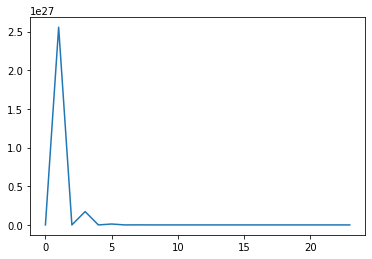

In [236]:
(simple_weights, log) = regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, tolerance)
import matplotlib.pyplot as plt
plt.plot(log)
plt.show()

Use your newly estimated weights and your predict_output() function to compute the predictions on all the TEST data (you will need to create a numpy array of the test feature_matrix and test output first:

In [237]:
(test_simple_feature_matrix, test_simple_output) = get_numpy_data(test_data, simple_features, simple_output)

Now compute your predictions using test_simple_feature_matrix and your weights from above.

In [238]:
predicted_output_on_test_data = predict_output(test_simple_feature_matrix, simple_weights)

In [239]:
predicted_output_on_test_data[1]

784640.8642278825

In [240]:
rss_simple = ((predicted_output_on_test_data - test_simple_output)**2).sum()

# Running a multiple regression

In [241]:
multiple_model_features = ['SqFtTotLiving', 'SqFtTotLiving15'] # sqft_living15 is the average squarefeet for the nearest 15 neighbors. 
multiple_output = 'SalePrice'
(multiple_feature_matrix, output) = get_numpy_data(train_data, multiple_model_features, multiple_output)
initial_weights = np.array([-100000., 1., 1.])
step_size = 4e-12
tolerance = 1e9

Use the above parameters to estimate the model weights. Record these values for your quiz.

In [242]:
(multiple_regression_weights, log) = regression_gradient_descent(multiple_feature_matrix, output, initial_weights, step_size, tolerance)


Use your newly estimated weights and the predict_output function to compute the predictions on the TEST data. Don't forget to create a numpy array for these features from the test set first!

In [243]:
(test_multiple_feature_matrix, test_multiple_output) = get_numpy_data(test_data, multiple_model_features, multiple_output)
test_multiple_output_predictions = predict_output(test_multiple_feature_matrix, multiple_regression_weights)

**Quiz Question: What is the predicted price for the 1st house in the TEST data set for model 2 (round to nearest dollar)?**

What is the actual price for the 1st house in the test data set?

**Quiz Question: Which estimate was closer to the true price for the 1st house on the TEST data set, model 1 or model 2?**

Now use your predictions and the output to compute the RSS for model 2 on TEST data.

In [244]:
rss2 = ((test_multiple_output_predictions - test_multiple_output)**2).sum()

**Quiz Question: Which model (1 or 2) has lowest RSS on all of the TEST data? **

In [245]:
test_data[0]

{'PropertyID': '0114101516',
 'DocumentDate': datetime.datetime(2014, 5, 28, 0, 0, tzinfo=GMT +0.0),
 'SalePrice': 310000,
 'Bedrooms': 3,
 'Bathrooms': 1.0,
 'SqFtTotLiving': 1430,
 'SqFtLot': 19901,
 'Stories': 1.5,
 'PrimeWaterfront': 0,
 'PrimeView': 0,
 'Condition': 4,
 'BldgGrade': 7,
 'SqFtAboveGround': 1430,
 'SqFtFinBasement': 0,
 'YrBuilt': 1927,
 'YrRenovated': 0,
 'ZipCode': '98028',
 'Latitude': 47.75584254,
 'Longitude': -122.22874498,
 'SqFtTotLiving15': 1780.0,
 'SqFtLot15': 12697.0,
 'constant': 1}